In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from individual_file import processor

In [32]:
comp = pd.DataFrame()
for number in range(2017,2020):
    comp[str(number)] = processor("Data\\{}_full.csv".format(number)).Delta
comp.insert(0, "Label", processor("Data/2017_full.csv").Label)
comp

,Label,2017,2018,2019
0,Citizens 18 years and over,0.000000,0.000000,0.000000
1,18 to 29 years,0.122052,0.063455,0.056454
2,30 to 44 years,0.122005,0.146213,0.104765
3,45 to 64 years,-0.146388,-0.166687,-0.144754
4,65 years and over,-0.097669,-0.042980,-0.016465
5,Male,0.321620,0.307172,0.268410
6,Female,-0.321620,-0.307172,-0.268410
7,White alone,2.011704,1.933601,1.845224
8,Black or African American alone,-2.173255,-2.117200,-2.096316
9,Asian alone,-0.324301,-0.303580,-0.272461


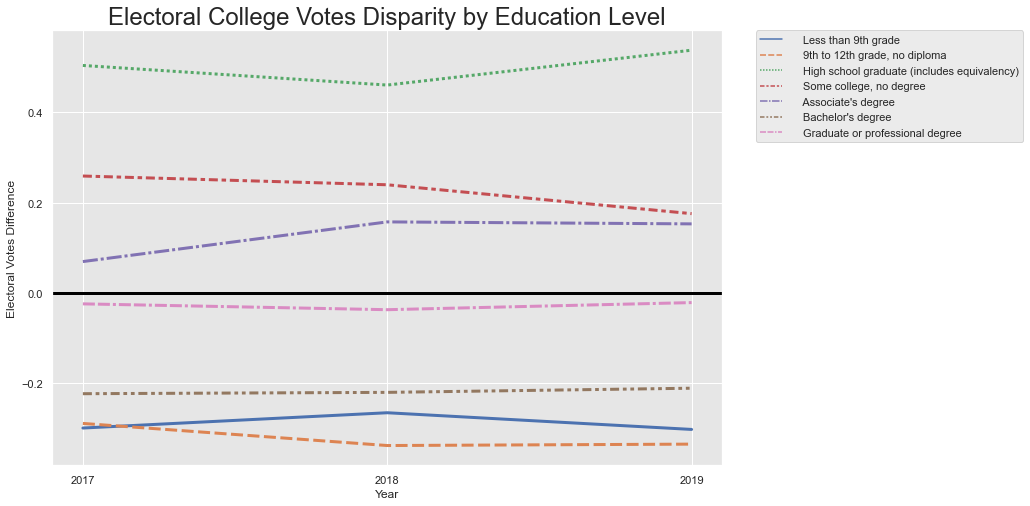

In [59]:
def plotter(data, start, end, plot_topic):
    temp = data[start:end]
    temp = temp.set_index("Label")
    temp = temp.transpose()

    sns.set(rc={'figure.figsize':(12,8)})

    # sns.set(style="whitegrid") #White background 
    sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #grey background

    g = sns.lineplot(data = temp,linestyle = '-', linewidth = 3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #axis line at y=0
    g.axhline(0, color = 'black', linewidth = 3)

    #labels + title
    g.set_title("Electoral College Votes Disparity by " + plot_topic, size=24)
    g.set(xlabel='Year', ylabel= "Electoral Votes Difference")
    return g

def race(data):
    return plotter(data, 8, 14, "Race")

def gender(data):
    return plotter(data,5,7, "Sex")

def poverty(data):
    return plotter(data,24,26,"Poverty Line")

def education(data):
    return plotter(data,14,21,"Education Level")

education(comp)